# Fluctuating Intensities
## Read file from OMERO and analyse fluctuations of pixel intensities
Laura Cooper 19/05/2020

# 1. Connect to OMERO

In [2]:
#Import packages
from omero.gateway import BlitzGateway
import getpass
import numpy as np
from scipy import fft, ndimage
import matplotlib.pyplot as plt

In [3]:
username = input('Username: ') #Request user to enter OMERO username
password = getpass.getpass(prompt='Password: ') #Request user to enter OMERO password
conn = BlitzGateway(username, password, host='camdu.warwick.ac.uk', port=4064) #Use details to connect to OMERO server
conn.connect() #Returns true when connected

Username: u1675160
Password: ········


True

In [4]:
print("Member of:")
for g in conn.getGroupsMemberOf():
    print("   ID:", g.getName(), " Name:", g.getId())
group = conn.getGroupFromContext()
print("Current group: ", group.getName())
# List the group owners and other members
owners, members = group.groupSummary()
print("   Group owners:")
for o in owners:
    print("     ID: %s %s Name: %s" % (
        o.getId(), o.getOmeName(), o.getFullName()))
    print("   Group members:")
for m in members:
    print("     ID: %s %s Name: %s" % (
        m.getId(), m.getOmeName(), m.getFullName()))

Member of:
   ID: system  Name: 0
   ID: default  Name: 3
   ID: camdu  Name: 153
   ID: lattice  Name: 453
   ID: Royle_Cooper  Name: 1003
Current group:  Royle_Cooper
   Group owners:
     ID: 3 mlsmaf Name: Stephen Royle
   Group members:
     ID: 3052 u1675160 Name: Laura Cooper


In [5]:
def print_obj(obj, indent=0):
    """
    Helper method to display info about OMERO objects.
    Not all objects will have a "name" or owner field.
    """
    print("""%s%s:%s  Name:"%s" (owner=%s)""" % (
        " " * indent,
        obj.OMERO_CLASS,
        obj.getId(),
        obj.getName(),
        obj.getOwnerOmeName()
    ))

In [6]:
print("\nList Datasets: \n", "=" * 50)
datasets = conn.getObjects("Dataset", opts={'owner': 3})
for dataset in datasets:
    print_obj(dataset, 2)
    for image in dataset.listChildren():
        print_obj(image, 4)


List Datasets: 
  Dataset:8202  Name:"ER" (owner=mlsmaf)
    Image:245956  Name:"200114HeLa_GFP-Rab15 10-1.tif" (owner=mlsmaf)
    Image:245951  Name:"200114HeLa_GFP-Rab15 10-2.tif" (owner=mlsmaf)
    Image:245961  Name:"200114HeLa_GFP-Rab15 10-3.tif" (owner=mlsmaf)
    Image:245953  Name:"200114HeLa_GFP-Rab15 10-4.tif" (owner=mlsmaf)
    Image:245957  Name:"200114HeLa_GFP-Rab15 8-1.tif" (owner=mlsmaf)
    Image:245955  Name:"200114HeLa_GFP-Rab15 8-2.tif" (owner=mlsmaf)
    Image:245962  Name:"200114HeLa_GFP-Rab15 8-3.tif" (owner=mlsmaf)
    Image:245954  Name:"200114HeLa_GFP-Rab15 8-4.tif" (owner=mlsmaf)
    Image:245949  Name:"200114HeLa_GFP-Rab17 3-1.tif" (owner=mlsmaf)
    Image:245948  Name:"200114HeLa_GFP-Rab17 3-2.tif" (owner=mlsmaf)
    Image:245959  Name:"200114HeLa_GFP-Rab17 3-3.tif" (owner=mlsmaf)
    Image:245947  Name:"200114HeLa_GFP-Rab17 3-4.tif" (owner=mlsmaf)
    Image:245958  Name:"200114HeLa_GFP-Rab17 7-1.tif" (owner=mlsmaf)
    Image:245950  Name:"200114HeLa_GFP-Ra

    Image:246089  Name:"FRAP 181114.mvd2 - HeLa_GFP 8_series_27.tiff" (owner=mlsmaf)
    Image:246093  Name:"FRAP 181114.mvd2 - HeLa_GFP 9_series_28.tiff" (owner=mlsmaf)
    Image:246076  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 10_series_9.tiff" (owner=mlsmaf)
    Image:246085  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 11_series_10.tiff" (owner=mlsmaf)
    Image:246074  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 12_series_11.tiff" (owner=mlsmaf)
    Image:246073  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 13_series_12.tiff" (owner=mlsmaf)
    Image:246094  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 14_series_13.tiff" (owner=mlsmaf)
    Image:246091  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 15_series_14.tiff" (owner=mlsmaf)
    Image:246092  Name:"FRAP 181114.mvd2 - HeLa_GFP-TPD54 16_series_15.tiff" (owner=mlsmaf)


In [7]:
image = conn.getObject("Image", 245956)
print(" Name:", image.getName())
print(" X:", image.getSizeX())
print(" Y:", image.getSizeY())
print(" Z:", image.getSizeZ())
print(" C:", image.getSizeC())
print(" T:", image.getSizeT())

 Name: 200114HeLa_GFP-Rab15 10-1.tif
 X: 20
 Y: 20
 Z: 30
 C: 1
 T: 1


## Convert image stack to np.array

In [8]:
def get_z_stack(img, c=0, t=0):
    zct_list = [(z, c, t) for z in range(img.getSizeZ())]
    pixels = image.getPrimaryPixels()
    return np.array(list(pixels.getPlanes(zct_list)))

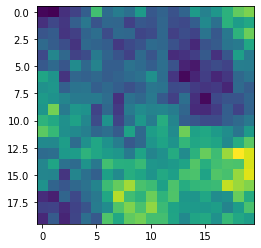

In [9]:
f = get_z_stack(image)
plt.imshow(f[0,:,:])
plt.show()

In [49]:
print(np.shape(f))
g=f[:,0,0]
print(g)
print(np.mean(f[:,0,0]))
print(np.mean(g))
test=np.mean(f, axis = 0) #check that this does what I think
print(test[0,0])
print(g-test[0,0])

(30, 20, 20)
[157 190 190 190 176 165 162 177 190 175 193 233 175 177 170 170 172 169
 170 198 201 219 245 188 210 216 178 204 169 201]
187.66666666666666
187.66666666666666
187.66666666666666
[-30.66666667   2.33333333   2.33333333   2.33333333 -11.66666667
 -22.66666667 -25.66666667 -10.66666667   2.33333333 -12.66666667
   5.33333333  45.33333333 -12.66666667 -10.66666667 -17.66666667
 -17.66666667 -15.66666667 -18.66666667 -17.66666667  10.33333333
  13.33333333  31.33333333  57.33333333   0.33333333  22.33333333
  28.33333333  -9.66666667  16.33333333 -18.66666667  13.33333333]


In [50]:
# mean velocity
u_bar=np.mean(f, axis = 0);
# turbulent fluctuations
u_fluct=np.subtract(f,u_bar)
print(u_fluct[:,0,0])

[-30.66666667   2.33333333   2.33333333   2.33333333 -11.66666667
 -22.66666667 -25.66666667 -10.66666667   2.33333333 -12.66666667
   5.33333333  45.33333333 -12.66666667 -10.66666667 -17.66666667
 -17.66666667 -15.66666667 -18.66666667 -17.66666667  10.33333333
  13.33333333  31.33333333  57.33333333   0.33333333  22.33333333
  28.33333333  -9.66666667  16.33333333 -18.66666667  13.33333333]


In [53]:
#Turblence Strength
u_rms=np.std(u_fluct, axis = 0)
#print(u_rms)

(20, 20)

In [67]:
v = f[:,0,0] #One pixel all time
t = range(0,30)

157

In [72]:
v_fluct=v-np.mean(v)
np.shape(v_fluct)
v_fluct[0]

-30.666666666666657

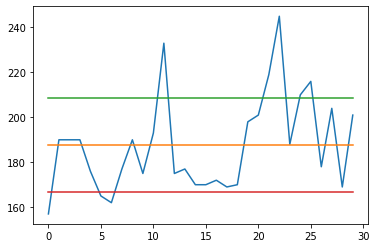

In [73]:
plt.plot(t,v)
plt.plot(t,np.mean(v)*np.ones(30))
plt.plot(t,(np.std(v_fluct)+np.mean(v))*np.ones(30))
plt.plot(t,(-np.std(v_fluct)+np.mean(v))*np.ones(30))
plt.show()

In [60]:
#Turbulence strength
np.std(v_fluct)

20.95603864177473

In [61]:
#Turbulence Intensity
np.std(v_fluct)/np.mean(v)

0.11166628050679252

In [62]:
## Example 1D FFT

<function matplotlib.pyplot.show(*args, **kw)>

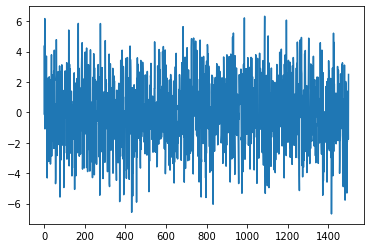

In [118]:
# Create a signal with some noise
#np.random.seed(10)
Fs=1000; #Sample freqency
L=1500 # Length of signal
T = 1/Fs; #Sampling period   
t=np.arange(0,L,1)*T # Time Vector
Hz1=50; #Signal 1\n",
Hz2=120; #Signal 2\n",
F=np.sin(2*np.pi*Hz1*t)+np.sin(2*np.pi*Hz2*t)+2*(np.random.randn(len(t)))
plt.plot(1000*t,F)
plt.show

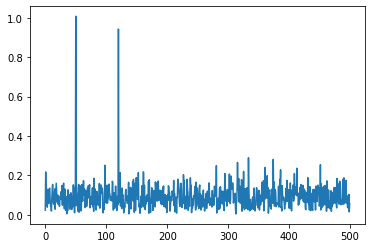

In [119]:
Y=fft.fft(F); # Fourier transform of function\n",
P2=abs(Y/L) #2 sided spectrum\n",
P1=P2[0:int(L/2)]; #1 sided spectrum\n",
P1[1:len(P1)-1]=2*P1[1:len(P1)-1];
fd=Fs*np.arange(0,L/2,1)/L; #Freqency fomain\n",
plt.plot(fd,P1)

## Back to 1 pixel

[9.47390314e-15 5.88286410e+00 6.40595465e+00 6.56211652e+00
 1.64177023e+00 2.40208243e+00 2.26426565e+00 2.77026391e+00
 2.78714966e+00 3.07259645e+00 2.37510234e+00 4.24192850e+00
 2.60891441e+00 4.60413238e+00 1.88063791e+00 3.80000000e+00
 1.88063791e+00 4.60413238e+00 2.60891441e+00 4.24192850e+00
 2.37510234e+00 3.07259645e+00 2.78714966e+00 2.77026391e+00
 2.26426565e+00 2.40208243e+00 1.64177023e+00 6.56211652e+00
 6.40595465e+00 5.88286410e+00]


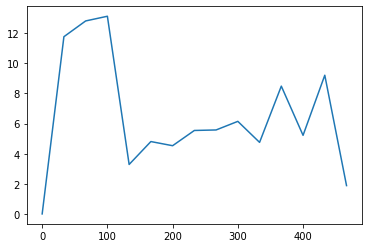

In [77]:
Fs=1000; #Sample freqency
L=30 # Length of signal 

v_fft=fft.fft(v_fluct)
P2=abs(v_fft/L) #2 sided spectrum\n",
P1=P2[0:int(L/2)]; #1 sided spectrum\n",
P1[1:len(P1)-1]=2*P1[1:len(P1)-1];
fd=Fs*np.arange(0,L/2,1)/L; #Freqency fomain\n",
plt.plot(fd,P1)

## All pixels

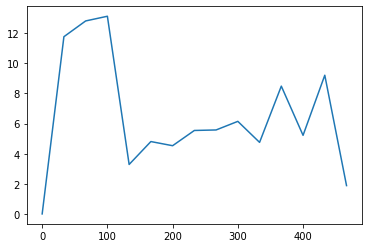

In [80]:
Fs=1000; #Sample freqency
L=30 # Length of signal 

u_fft=fft.fft(u_fluct, axis = 0)
P2=abs(u_fft/L) #2 sided spectrum\n",
P1=P2[0:int(L/2)]; #1 sided spectrum\n",
P1[1:len(P1)-1]=2*P1[1:len(P1)-1];
fd=Fs*np.arange(0,L/2,1)/L; #Freqency fomain\n",
plt.plot(fd,P1[:,0,0])

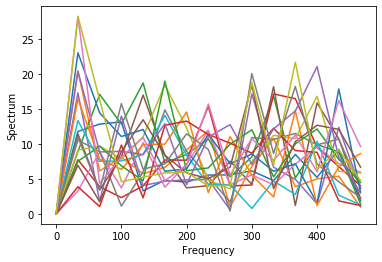

In [100]:
fig, ax1 = plt.subplots()
for i in range(19):
    plt.plot(fd,P1[:,i,i])

ax1.set_ylabel('Spectrum')
ax1.set_xlabel('Frequency')
plt.show()

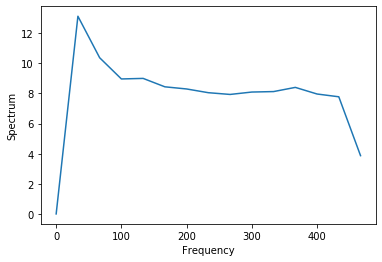

In [109]:
np.shape(P1)
P1_mean=np.mean(P1,axis=(1,2))
np.shape(P1_mean)

fig, ax1 = plt.subplots()
plt.plot(fd,P1_mean)

ax1.set_ylabel('Spectrum')
ax1.set_xlabel('Frequency')
plt.show()

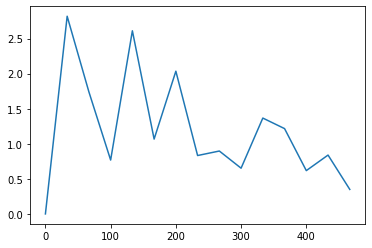

In [126]:
L=30 # Length of signal 

u_fluct_mean=np.mean(u_fluct, axis=(1,2))
u_fft_mean=fft.fft(u_fluct_mean)
P2=abs(u_fft_mean/L) #2 sided spectrum\n",
P1=P2[0:int(L/2)]; #1 sided spectrum\n",
P1[1:len(P1)-1]=2*P1[1:len(P1)-1];
plt.plot(fd,P1)